In [20]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
import multiprocessing as mp
from multiprocessing.sharedctypes import RawArray
from math import sin, pi
from ctypes import c_int16

In [34]:
arr = RawArray(c_int16, 10)
for i in range(10):
    arr[i] = i
    print(arr[i])

def funk(arr):
    print(len(arr))

funk(arr)

0
1
2
3
4
5
6
7
8
9
10


In [3]:
files = [f for f in listdir('./') if f[-4:] == 'h5py']
print(files)

['stable_A.h5py', 'stable_AB.h5py', 'stable_B.h5py', 'stable_BA.h5py', 'test.h5py']


In [4]:
f = h5py.File('test.h5py', 'w')

dat = f.create_dataset('dat', shape=(10,), dtype='int16')
udat = f.create_dataset('udat', shape=(10,), dtype='uint16')

for i in range(10):
    udat[i] = i-5
    dat[i] = i-5

f.close()
f = h5py.File('test.h5py', 'r')
                        
for key in f.keys():
    print(key)
    print(f[key][()])
f.close()

dat
[-5 -4 -3 -2 -1  0  1  2  3  4]
udat
[0 0 0 0 0 0 1 2 3 4]


In [26]:
MAX = (2**16 - 1)

class Seg(mp.Process):
    
    def __init__(self, array):
        super().__init__(args=(array))
        
    def run(self):
        N = len(array)
        for i in range(N):
            array[i] = c_int16(MAX*sin(2*pi*i/N))
        print(array)

In [28]:
def targ(self, array):
        N = len(array)
        for i in range(N):
            array[i] = c_int16(MAX*sin(2*pi*i/N))
        print(array)

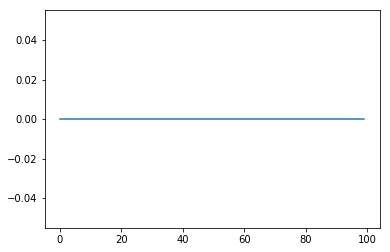

In [29]:
procs = []
data = []
for i in range(mp.cpu_count()):
    dat = RawArray(c_int16, 100)
    data.append(dat)
    
    p = mp.Process(target=targ, args=dat)
    procs.append(p)
    p.start()

for p in procs:
    p.join()
d = data.pop()    
print(d)
plt.plot(d)
plt.show()